In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob


sns.set_style('whitegrid')

In [3]:
metrics_files = glob.glob('**/**.json')
metrics_dicts = []

for file in metrics_files:
    with open(file, 'r') as f:
        if 'roberta' in file:
            
            if 'old' in file:
                continue
            print(file)
            metrics_dicts.append(json.load(f))


sst2/run-metrics-roberta-base.json
tweet_eval/run-metrics-roberta-base.json
imdb/run-metrics-roberta-base.json


In [4]:
sst2_dic = metrics_dicts[0]
tweet_eval_dic = metrics_dicts[1]
imdb_dic = metrics_dicts[2]

In [5]:
dicts = [sst2_dic, tweet_eval_dic, imdb_dic]
dict_names = ['sst2_dic', 'tweet_eval_dic', 'imdb_dic']

In [6]:
def scale_data(values):
    mn = min(values)
    mx = max(values)

    norm = mx - mn

    scaled_values = [(val - mn)/norm for val in values]
    return scaled_values

In [7]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))
# for i, dic in enumerate(dicts):
#     ax = axs[i//2, i%2]
#     var_dic = dic['variance_metrics']
#     mod_dic = dic['modelling_metrics']
#     ax.plot(var_dic['subset_sizes'], var_dic['r2_values'], marker='o')
#     ax.plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker='o')
#     ax.set_title(dict_names[i])
#     ax.set_xlabel('Subset Sizes')
#     ax.set_ylabel('R2 Values & Test accuracies')

# plt.tight_layout()
# plt.show()

[0.8225366954785767, 0.8276734963962983, 0.8294683561269097, 0.8302591406563209, 0.8308673670286855, 0.8310262875154178, 0.8314008131858754, 0.8315563909921682, 0.8317919433590023, 0.8318644983286314]
[0.8411859981246662, 0.8487844275561733, 0.8513366383833808, 0.8529798364133824, 0.8536601325151819, 0.8542671077744504, 0.8546646764762648, 0.8548811969909692, 0.8551485649509256, 0.8553861563253344]
[0.8870486591138649, 0.8930879923119861, 0.89518950809871, 0.8962570801916665, 0.897006641255916, 0.8973546288666676, 0.8976835776365871, 0.8978446023564972, 0.8980875001717864, 0.8982464138792486]


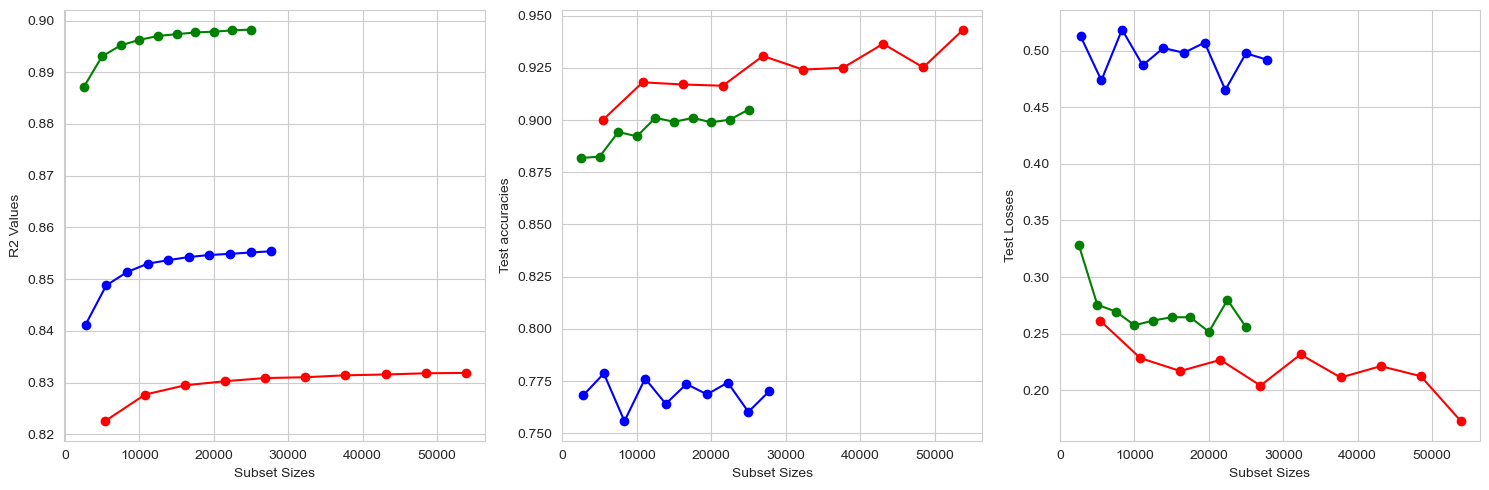

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    mod_dic = dic['modelling_metrics']
    print(var_dic['r2_values'])
    axs[0].plot(var_dic['subset_sizes'], var_dic['r2_values'], marker="o", color=color[i])
    axs[1].plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker="o", color=color[i])
    axs[2].plot(var_dic['subset_sizes'], mod_dic['test_losses'], marker="o", color=color[i])

axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[2].set_xlabel('Subset Sizes')
axs[2].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

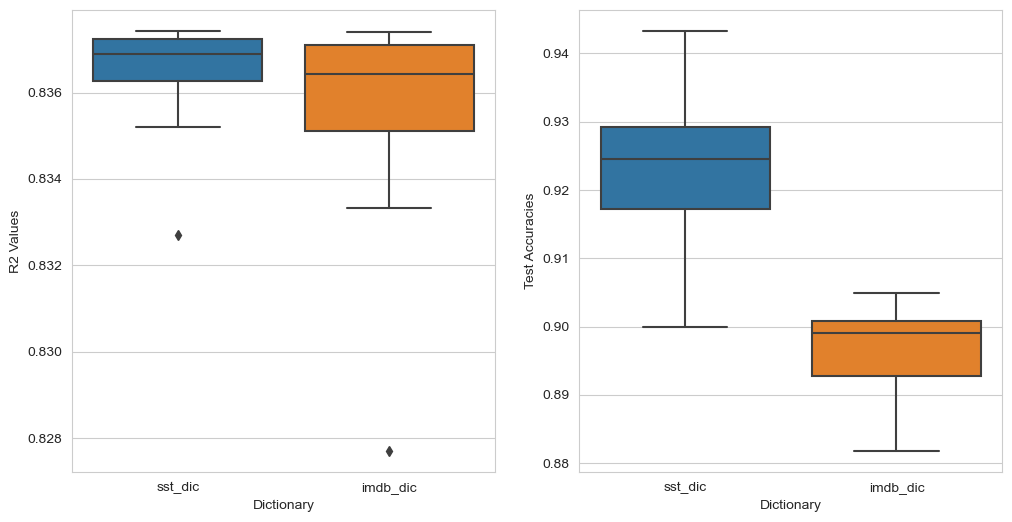

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

data1 = []
data2 = []
for dic, name in zip(dicts, dict_names):
    full_data_len = dic['variance_metrics']['subset_sizes'][-1]
    data1.extend([(name, val, full_data_len) for val in dic['variance_metrics']['r2_values']])
    data2.extend([(name, val, full_data_len) for val in dic['modelling_metrics']['test_accuracies']])
    # data.extend([(name, val*full_data_len) for val in dic['variance_metrics']['r2_values']])
df1 = pd.DataFrame(data1, columns=['Dictionary', 'R2 Values', 'Size'])
df2 = pd.DataFrame(data2, columns=['Dictionary', 'Test Accuracies', 'Size'])
sns.boxplot(x='Dictionary', y='R2 Values', data=df1, ax=axs[0])
sns.boxplot(x='Dictionary', y='Test Accuracies', data=df2, ax=axs[1])
plt.show()

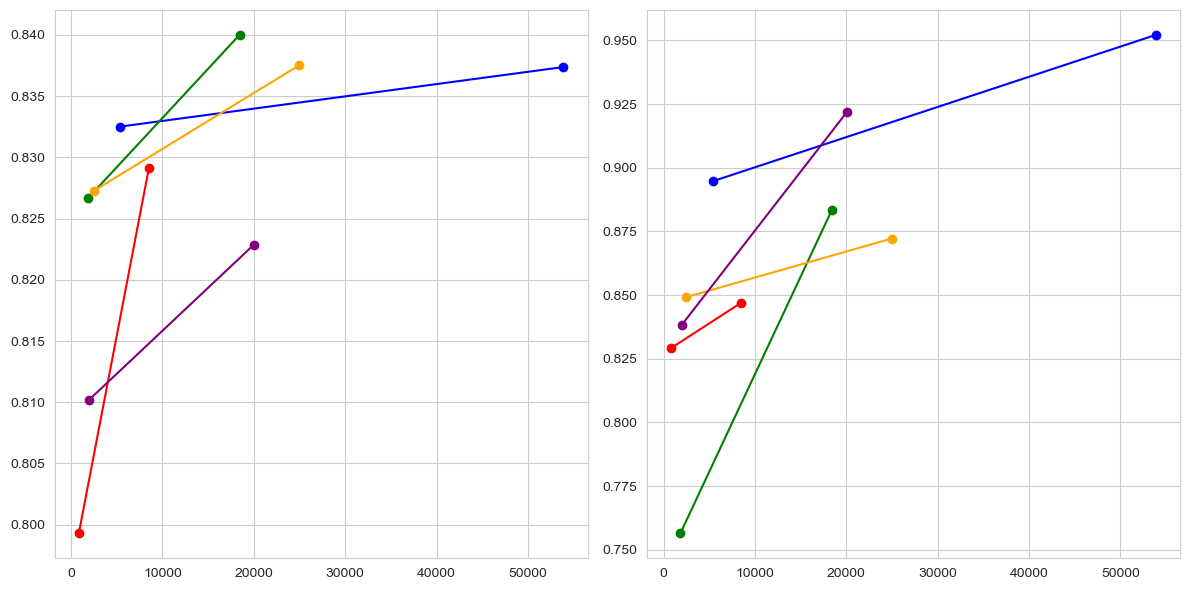

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_accuracies'][0], mod_dic['test_accuracies'][-1]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

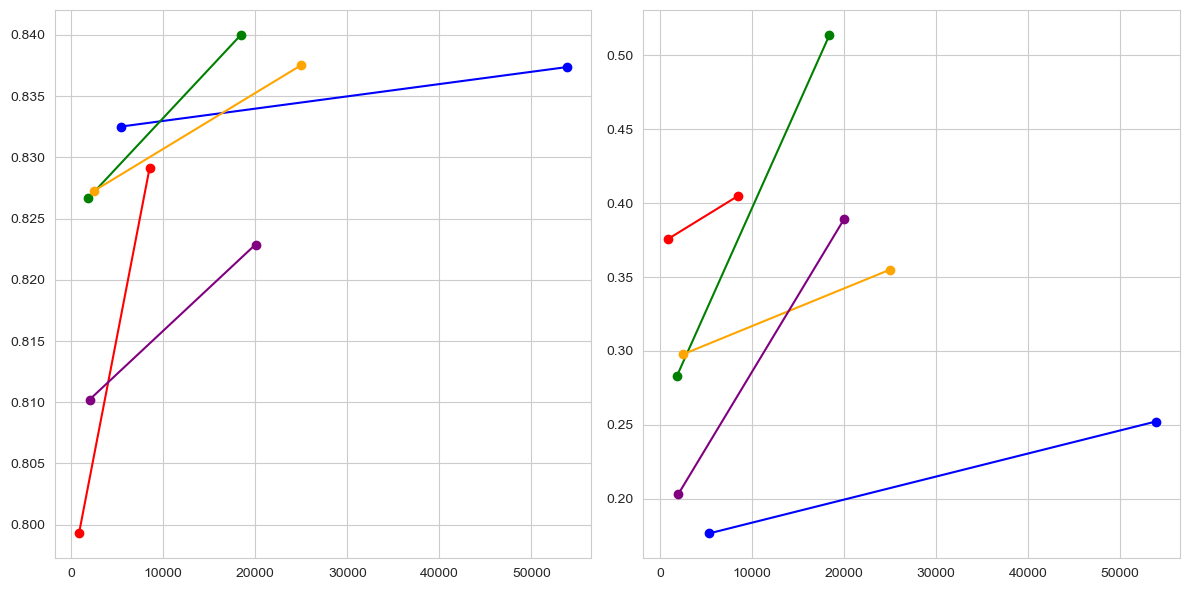

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_losses'][-1], mod_dic['test_losses'][0]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

In [2]:
imdb_df = pd.read_csv('./analysis_results/imdb_roberta.csv')
tweet_eval_df = pd.read_csv('./analysis_results/tweet_eval_roberta.csv')
sst2_df = pd.read_csv('./analysis_results/sst2_roberta.csv')

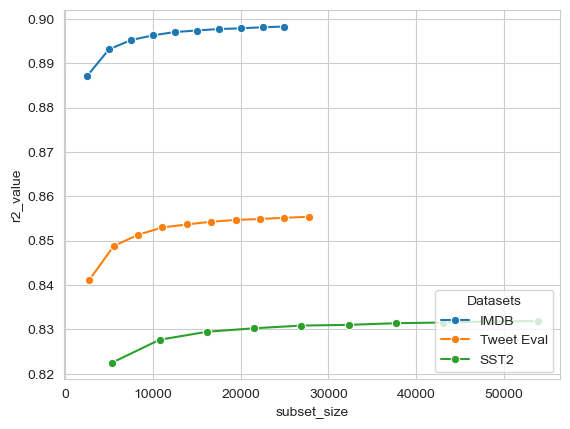

In [3]:
sns.lineplot(x=imdb_df['subset_size'], y=imdb_df['r2_value'], marker='o')
sns.lineplot(x=tweet_eval_df['subset_size'], y=tweet_eval_df['r2_value'], marker='o')
sns.lineplot(x=sst2_df['subset_size'], y=sst2_df['r2_value'], marker='o')
plt.legend(title='Datasets', loc='lower right', labels=['IMDB', 'Tweet Eval', 'SST2'])


In [6]:
imdb_df = pd.read_csv('./analysis_results/imdb_roberta.csv')
tweet_eval_df = pd.read_csv('./analysis_results/tweet_eval_roberta.csv')
sst2_df = pd.read_csv('./analysis_results/sst2_roberta.csv')

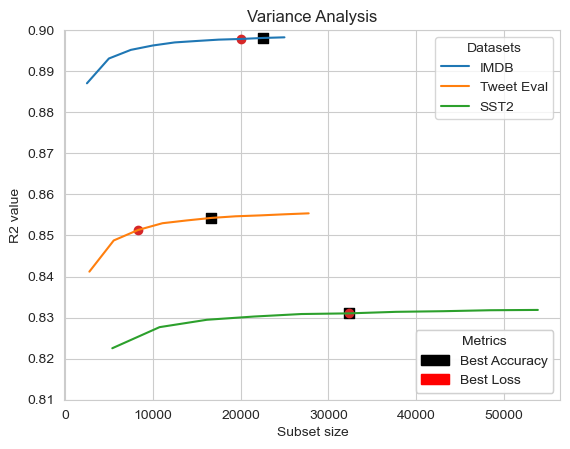

In [8]:

import matplotlib.patches as mpatches

sns.lineplot(x=imdb_df['subset_size'], y=imdb_df['r2_value'], legend=True)
sns.lineplot(x=tweet_eval_df['subset_size'], y=tweet_eval_df['r2_value'])
sns.lineplot(x=sst2_df['subset_size'], y=sst2_df['r2_value'])


# plt.scatter(imdb_df['subset_size'].iloc[1], imdb_df['r2_value'].iloc[1], color='red')
# plt.scatter(tweet_eval_df['subset_size'].iloc[1], tweet_eval_df['r2_value'].iloc[1], color='red')
# plt.scatter(sst2_df['subset_size'].iloc[1], sst2_df['r2_value'].iloc[1], color='red')
plt.scatter(imdb_df['subset_size'].iloc[imdb_df['mean_odd_accuracy'].idxmax()], imdb_df['r2_value'].iloc[imdb_df['mean_odd_accuracy'].idxmax()], color='black', s=50, marker='$\u25A0$')
plt.scatter(tweet_eval_df['subset_size'].iloc[tweet_eval_df['mean_odd_accuracy'].idxmax()], tweet_eval_df['r2_value'].iloc[tweet_eval_df['mean_odd_accuracy'].idxmax()], color='black', s=50, marker='$\u25A0$')
plt.scatter(sst2_df['subset_size'].iloc[sst2_df['mean_odd_accuracy'].idxmax()], sst2_df['r2_value'].iloc[sst2_df['mean_odd_accuracy'].idxmax()], color='black', s=50, marker='$\u25A0$')

plt.scatter(imdb_df['subset_size'].iloc[imdb_df['mean_odd_loss'].idxmin()], imdb_df['r2_value'].iloc[imdb_df['mean_odd_loss'].idxmin()], color=plt.cm.tab10(3))
plt.scatter(tweet_eval_df['subset_size'].iloc[tweet_eval_df['mean_odd_loss'].idxmin()], tweet_eval_df['r2_value'].iloc[tweet_eval_df['mean_odd_loss'].idxmin()], color=plt.cm.tab10(3))
plt.scatter(sst2_df['subset_size'].iloc[sst2_df['mean_odd_loss'].idxmin()], sst2_df['r2_value'].iloc[sst2_df['mean_odd_loss'].idxmin()], color=plt.cm.tab10(3))



best_accuracy = mpatches.Patch(color='black',  label='Best Accuracy')
best_loss = mpatches.Patch(color='red', label='Best Loss')
plt.gca().add_artist(plt.legend(title='Datasets', loc='upper right', labels=['IMDB', 'Tweet Eval', 'SST2']))
plt.gca().add_artist(plt.legend(handles=[best_accuracy, best_loss], title='Metrics', loc='lower right'))
plt.ylim((0.81, 0.9))


xlabel = plt.gca().get_xlabel()
xlabel = xlabel.replace('_', ' ').capitalize()
plt.gca().set_xlabel(xlabel)

ylabel = plt.gca().get_ylabel()
ylabel = ylabel.replace('_', ' ').capitalize()
plt.gca().set_ylabel(ylabel)

plt.title('Variance Analysis')

plt.savefig("./plots/roberta_variance_analysis.png", dpi=600, bbox_inches='tight')

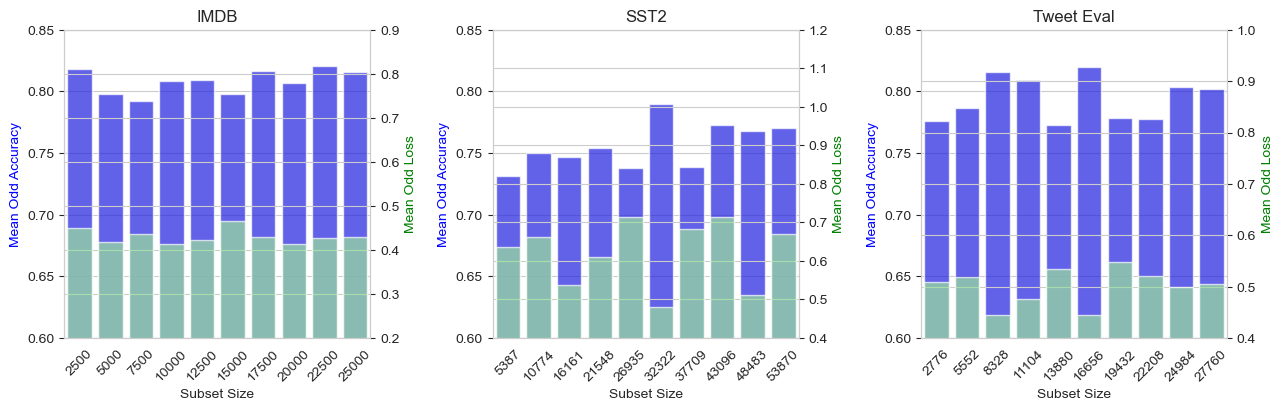

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot = sns.barplot(x=imdb_df['subset_size'], y=imdb_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[0])
plot.set_ylim(0.6, 0.85)
ax1 = axes[0].twinx()
plot = sns.barplot(x=imdb_df['subset_size'], y=imdb_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax1)
ax1.set_ylim(0.2, 0.9)
axes[0].set_title('IMDB')

plot = sns.barplot(x=sst2_df['subset_size'], y=sst2_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[1])
plot.set_ylim(0.6, 0.85)
ax2 = axes[1].twinx()
plot = sns.barplot(x=sst2_df['subset_size'], y=sst2_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax2)
ax2.set_ylim(0.4, 1.2)
axes[1].set_title('SST2')

plot = sns.barplot(x=tweet_eval_df['subset_size'], y=tweet_eval_df['mean_odd_accuracy'], alpha=0.7, color='blue', ax=axes[2])
plot.set_ylim(0.6, 0.85)
ax3 = axes[2].twinx()
plot = sns.barplot(x=tweet_eval_df['subset_size'], y=tweet_eval_df['mean_odd_loss'], alpha=0.7, color='lightgreen', ax=ax3)
ax3.set_ylim(0.4, 1.0)
axes[2].set_title('Tweet Eval')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)

axes[0].yaxis.label.set_color('blue')
ax1.yaxis.label.set_color('green')
axes[1].yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('green')
axes[2].yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('green')

for ax in [axes[0], ax1, axes[1], ax2, axes[2], ax3]:
    ax.set_xlabel(ax.get_xlabel().replace('_', ' ').title())
    ax.set_ylabel(ax.get_ylabel().replace('_', ' ').title())

plt.savefig("./plots/roberta_odd.png", dpi=600, bbox_inches='tight')